## Playing with Data

In [76]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf
import requests
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
from wordcloud import WordCloud, STOPWORDS
import string
%matplotlib inline

#### scraping product descriptions part 1


In [30]:
response = requests.get('https://www.us.allsaints.com/women/leather/allsaints-balfern-biker-wl048r/?colour=4136&category=502')
response
soup = bs4.BeautifulSoup(response.content, 'html.parser')

In [44]:
# Get all link elements
link_elements = soup.find_all('a')
# Get clickable text from links
texts = [a.text.strip().lower() for a in link_elements]
# Replace all whitespace with a sinlge space character
text = ' '.join(' '.join(texts).split())
text
soup

In [13]:
help(bs4)

In [45]:
import re
find_all_next
Get all link elements
link_elements = soup.find_all('script')
# Get clickable text from links
texts = [a.text.strip().lower() for a in link_elements]
# Replace all whitespace with a sinlge space character
text = ' '.join(' '.join(texts).split())
re.findall("description:", soup)
soup

In [79]:
urls = "https://www.newegg.com/p/pl?N=100161551%204814&cm_sp=Cat_Cell-Phones_1-_-VisNav-_-Unlocked-Cell-Phones"
uClient = uReq(urls)
page_html = uClient.read()
uClient.close()

page_soup = soup(page_html, "html.parser")
page_soup
containers = page_soup.find_all("div", {"class":"item-container"}) #Selecting the inspection text of products
len(containers) #Returns the number of products on the webpage
# containers[0] #To get inspection text agaist that particular product


36

In [9]:
contain = containers[0]
container = containers[0]
container.a.img["title"] #Product description
# container


In [8]:
descriptions = []
for container in containers:
    a = [container.a.img["title"]]
    descriptions.append(a)

print(descriptions[12])

#### TO DO LIST:

Think of putting this data into a suitable data-structure

Look for image captioning videos

Look into LSTM Networks

Try Scraping data from multiple websites

Perform some analysis on the data that you scrape

Try hands on Stemming, Lemmas, Stop words, etc.


#### Scraping Data from the list of websites

In [14]:
url_list = ["https://www.newegg.com/p/pl?N=100161551%204814&cm_sp=Cat_Cell-Phones_1-_-VisNav-_-Unlocked-Cell-Phones"]

for i in range(2,101):
    url_list.append("https://www.newegg.com/p/pl?N=100161551%204814&Page="+str(i))    

# url_list contains the list of all the webpages scrapped!
    
def scrape(url_list):
    """
    This function scrapes product data descriptions from multiple pages at newegg.com 
    """
    no_prod = []
    descriptions = []
    for url in url_list:
        uClient = uReq(url)
        page_html = uClient.read()
        uClient.close()
        page_soup = soup(page_html, "html.parser")
        containers = page_soup.find_all("div", {"class":"item-container"}) #Selecting the inspection text of products
        no_prod.append(len(containers)) #Returns the number of products on the webpage

    #Looping through containers of every page to get the product description
        for container in containers:
            a = [container.a.img["title"]]
            descriptions.append(a)
    return descriptions

In [16]:
return_data = scrape(url_list)
print(len(return_data))

360


In [25]:
return_data

[['AIEK KK1 Mini Bluetooth Quad Band Unlocked Phone Anti-lost Automatic Answer Low Radiation English Keyboard'],
 ['Unlocked Cell Phone CUBOT POWER 4G Phablet MTK6763T Octa Core 6GB RAM 128GB ROM'],
 ['3G GSM Unlocked Android 4.4.2 SmartWatch by Indigi® - 1.3" HD IPS - DualCore - Bluetooth 4.2 Sync - WiFi & GPS'],
 ['Apple iPhone 8 Plus 64GB Unlocked GSM/CDMA Phone w/ 12MP Camera - Silver'],
 ['Nokia Lumia 928 RM-860 4G LTE 32GB Verizon/Unlocked GSM Windows Phone 4.5" Black 32GB 1GB RAM'],
 ['Global Version Xiaomi Redmi Note 4 Snapdragon 625 Octa Core CPU Mobile Phone 3GB RAM 32GB ROM 5.5" FHD 13.0MP 4100mAh Band B4'],
 ['Samsung Galaxy S10 (SM-G9730) 6.1" 8GB / 128GB LTE Dual SIM UNLOCKED International Version (Prism GREEN)'],
 ['Global Firmware Lenovo Z6 6+64GB Snapdragon 730 Octa core 4G LTE Mobile Phone 6.39" 4000mAh Quad camera Fingerprint Unlocked phone - Blue'],
 ['Indigi® #1 NEW Unlocked Watch & 3G SmartPhone - Android 5.1 - WiFi - GPS(Maps) - Bluetooth 4.0 Sync'],
 ['BlackBerr

#### Flattening the data for word cloud

In [52]:

def recursive(return_data):
    flat = []
    for i in return_data:
        if isinstance(i, list):
            flatten = rec(i)
            flat.extend(flatten)
        else :
            flat.append(i)
    return flat
flat = rec(return_data)

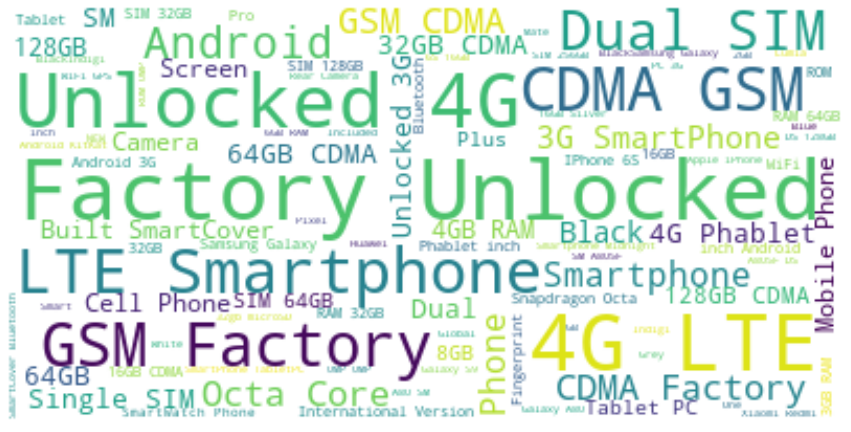

In [64]:
text = ''.join(desc for desc in flat)
wordcloud = WordCloud(max_font_size=100, max_words=150, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Getting the Average length of product descriptions

In [176]:
length_of_descriptions = []
for i in return_data:
    length_of_descriptions.append(len(i[0].strip().split()))
print("Average Length of descriptions:", int(np.mean(length_of_descriptions)))
print("Maximum Length of descriptions:", max(length_of_descriptions))

Average Length of descriptions: 16
Maximum Length of descriptions: 47


#### Cleaninig the Data and preparing it for passing it through the LSTM Network

In [104]:
def clean_descriptions(text):
    """Since punctuations may mean something in this case, we keep them in the description, eg: ios 11.0.1 """
    token = text.split()
#     table = str.maketrans("", "", string.punctuation)
#     tokens = [w.translate(table) for w in token]
#     tokens = [word for word in tokens if not in word]
    tokens = [word.lower() for word in token]
    return tokens

In [112]:
unique_words = len(set(clean_descriptions(text)))
print("Number of Unique Words:", unique_words)

tokens = clean_descriptions(text)

total_words = len(clean_descriptions(text))
print("Number of Words", total_words)

Number of Unique Words: 1066
Number of Words 5551


In [177]:
length = 47 + 1
lines = []
for i in range(length, total_words):
    seq = tokens[i-length:i]
    line = ' '.join(seq)
    lines.append(line)
    
print(len(lines))
# lines  #Print to get a view of how the lines look like

5503


#### Building a basic LSTM Model

In [178]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [179]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)
print(sequences)   #Converting words into numbers(Embeddings)

[[916, 915, 449, 42, 95, 285, 1, 15, 913, 914, 912, 911, 909, 907, 216, 906, 55, 15, 903, 214, 4, 31, 284, 30, 27, 82, 24, 19, 898, 3, 1, 13, 12, 12, 23, 66, 445, 93, 21, 68, 108, 165, 283, 42, 12, 23, 163, 54], [915, 449, 42, 95, 285, 1, 15, 913, 914, 912, 911, 909, 907, 216, 906, 55, 15, 903, 214, 4, 31, 284, 30, 27, 82, 24, 19, 898, 3, 1, 13, 12, 12, 23, 66, 445, 93, 21, 68, 108, 165, 283, 42, 12, 23, 163, 54, 450], [449, 42, 95, 285, 1, 15, 913, 914, 912, 911, 909, 907, 216, 906, 55, 15, 903, 214, 4, 31, 284, 30, 27, 82, 24, 19, 898, 3, 1, 13, 12, 12, 23, 66, 445, 93, 21, 68, 108, 165, 283, 42, 12, 23, 163, 54, 450, 40], [42, 95, 285, 1, 15, 913, 914, 912, 911, 909, 907, 216, 906, 55, 15, 903, 214, 4, 31, 284, 30, 27, 82, 24, 19, 898, 3, 1, 13, 12, 12, 23, 66, 445, 93, 21, 68, 108, 165, 283, 42, 12, 23, 163, 54, 450, 40, 33], [95, 285, 1, 15, 913, 914, 912, 911, 909, 907, 216, 906, 55, 15, 903, 214, 4, 31, 284, 30, 27, 82, 24, 19, 898, 3, 1, 13, 12, 12, 23, 66, 445, 93, 21, 68, 108

In [188]:
sequences = np.array(sequences)
sequences
X,y = np.array(for i in sequences
# for i in sequences:
#     print(len(i))

In [193]:
## To be continued!